In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from ipywidgets import interact

%matplotlib inline

from lg_mode_generation import LG_mode_generation

# Load the model with sample config (pure Gaussian beam)

In [2]:
lg_mode = LG_mode_generation('attosecond')
lg_mode.calculate_field()

Calculating LG modes...OK!
Calculating reflected fields...OK!
Calculating field spectrum...OK!
Finished training in 9.110424 seconds.


True

# Attosecond pulse generation

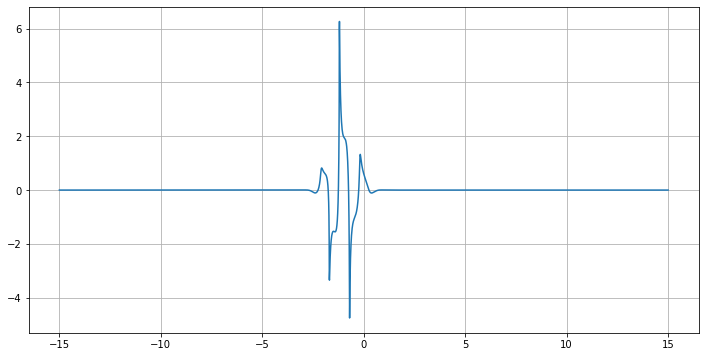

In [3]:
plt.figure(figsize=(12,6))
plt.plot(np.linspace(lg_mode.zmin, lg_mode.zmax, lg_mode.nofzs), lg_mode.refl_field[0,2])
plt.grid()
plt.show()

In [4]:
freqs = 2*np.pi*lg_mode.fft_freq
cfreq, freq_width = (40, 10)
cut_func1 = np.exp(-((freqs-cfreq)/freq_width)**10)
cut_func2 = np.exp(-((freqs+cfreq)/freq_width)**10)
cut_func_total = (cut_func1+ cut_func2)
spectrum_filtered = cut_func_total *  lg_mode.fft_result[0,2]

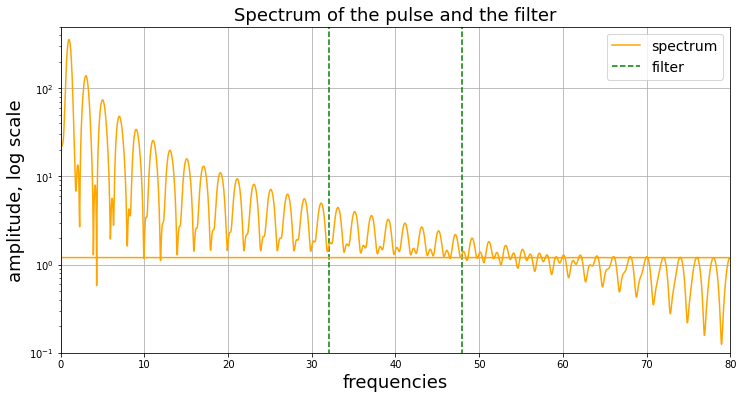

In [5]:
plt.figure(figsize=(12,6))
plt.title("Spectrum of the pulse and the filter", fontsize=18)
plt.grid()

plt.semilogy(freqs,np.abs(lg_mode.fft_result[0,2]), label='spectrum', c='orange')
#plt.plot(freqs,100*(cut_func_total>0.9), label='filter', linestyle='--', c='green')
plt.vlines(32,0,1000, linestyle='--', color='green', label='filter')
plt.vlines(48,0,1000, linestyle='--', color='green')
plt.xlim((0,80))
plt.ylim(1e-1, 500)
plt.xlabel("frequencies", fontsize=18)
plt.ylabel("amplitude, log scale", fontsize=18)
plt.legend(fontsize=14)
plt.savefig("spectrum.png")
plt.show()

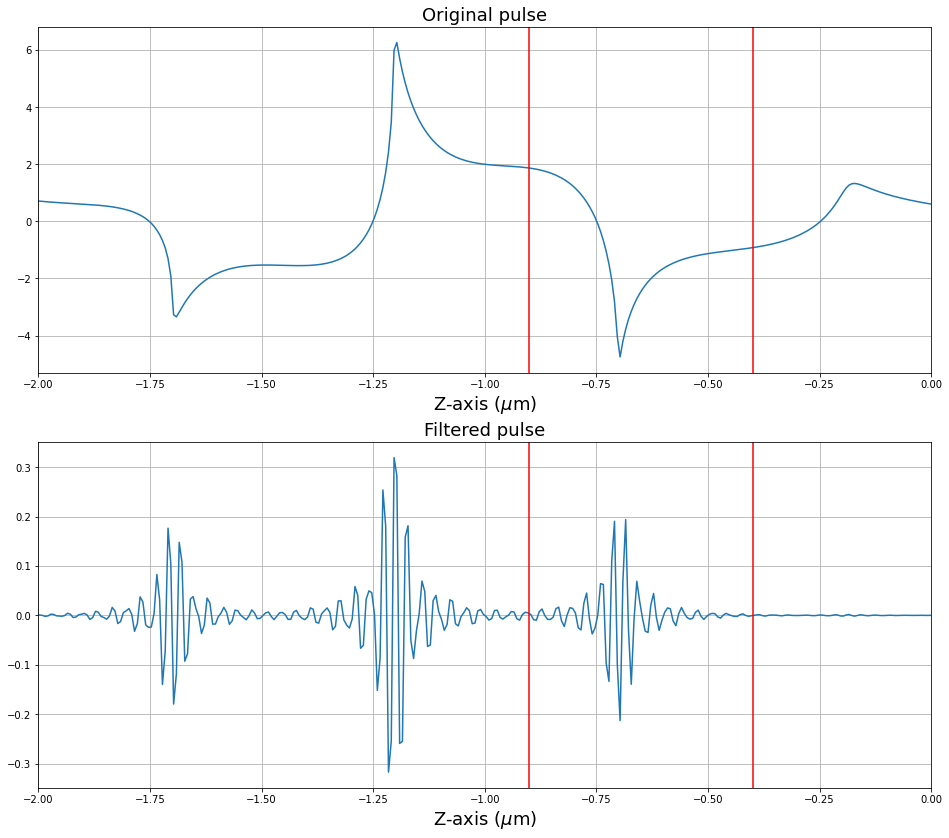

In [6]:
fig = plt.figure(figsize=(16,14))
ax = fig.add_subplot(211)
ax.set_title(f"Original pulse", fontsize=18)
ax.plot(np.linspace(lg_mode.zmin, lg_mode.zmax, lg_mode.nofzs), lg_mode.refl_field[0,2])
ax.set_xlabel("Z-axis ($\mu$m)", fontsize=18)
ax.axvline(x=-0.9, c='red')
ax.axvline(x=-0.4, c='red')
ax.grid()
ax.set_xlim(-2,0)


ax = fig.add_subplot(212)
ax.set_title(f"Filtered pulse", fontsize=18)
ax.plot(np.linspace(lg_mode.zmin, lg_mode.zmax, lg_mode.nofzs), np.real(np.fft.ifft(spectrum_filtered)))
ax.set_xlabel("Z-axis ($\mu$m)", fontsize=18)
ax.grid()
ax.axvline(x=-0.9, c='red')
ax.axvline(x=-0.4, c='red')
ax.set_xlim(-2,0)
plt.savefig("original_and_filtered.png")
plt.show()

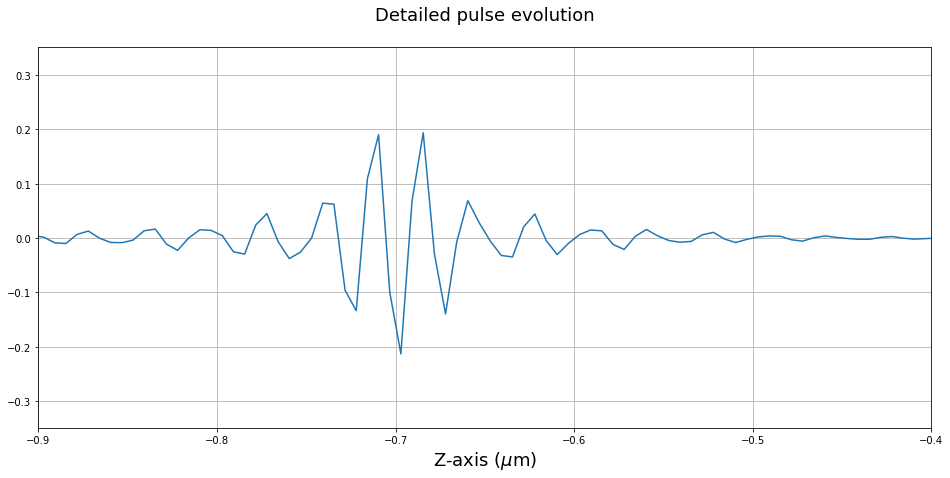

In [7]:
plt.figure(figsize=(16,7))
plt.plot(np.linspace(lg_mode.zmin, lg_mode.zmax, lg_mode.nofzs), np.real(np.fft.ifft(spectrum_filtered)))
plt.title("Detailed pulse evolution\n", fontsize=18)
plt.xlabel("Z-axis ($\mu$m)", fontsize=18)
plt.grid()
#plt.axvline(x=-0.71, c='green', linestyle="--")
#plt.axvline(x=-0.685, c='green', linestyle="--")
plt.xlim(-0.9,-0.4)
plt.savefig("detailed_pulse.png")
plt.show()

The duration of the selected slice (in $\mu$m) is 0.025

In [8]:
mum_length = 0.025
omega = 2*np.pi*(3*10**10)/(mum_length*1e-4)
print("The duration of such pulse is %.3f attoseconds." %(2*np.pi/omega*1e18))

The duration of such pulse is 83.333 attoseconds.


In [9]:
lg_mode.refl_field.shape

(150, 20, 4800)

In [10]:
filtered = np.real(np.fft.ifft(np.fft.fft(lg_mode.refl_field, axis=2)*cut_func_total))

In [11]:
#plt.figure(figsize=(12,6))
#
#plt.imshow(lg_mode.refl_field[2],
#           aspect='auto', 
#           cmap=plt.get_cmap('jet'))
#plt.colorbar()
#plt.show()
#lt.savefig("angular_inp.png")
#plt.figure(figsize=(12,6))

#plt.imshow(100*np.abs(np.fft.ifft(np.fft.fft(lg_mode.refl_field[2],
#                                          axis=1)*cut_func_total)), 
#           aspect='auto',
#           cmap=plt.get_cmap('jet'))
#plt.show()
#plt.colorbar()
#lt.savefig("angular_res.png")

In [12]:
#bin = np.array((lg_mode.zmirror>lg_mode.refl_field), dtype=np.int)
#
#r = np.linspace(0,19,20)
#phi = np.linspace(0,2*np.pi,150)
#@interact(n=(0,4799,5))
#def Plotter(n=0):
#    plt.figure(figsize=(4,4))
#    plt.gca(projection="polar")
#    plt.pcolormesh(phi,r,np.transpose(bin, [1,0,2])[:,:,n])
#    plt.show()

In [13]:
refl_field_cartesian = np.zeros((40,40,4800))

for rho in range(20):
    for phi in range(150):
        #print(rho, phi, int(rho*np.cos(phi*2*np.pi/150.)),int(rho*np.sin(phi*2*np.pi/150.)))
        refl_field_cartesian[19+int(rho*np.cos(phi*2*np.pi/150.)), 19+int(rho*np.sin(phi*2*np.pi/150.)),:] = \
        lg_mode.refl_field[phi, rho, :]

In [14]:
refl_field_cartesian.min(), lg_mode.refl_field.min()

(-4.826383401975266, -4.851671895767377)

In [15]:
r = np.linspace(0,19,20)
phi = np.linspace(0,2*np.pi,150)
@interact(n=(0,4799,5))
def Plotter(n=0):
    plt.figure(figsize=(4,4))
    plt.imshow(refl_field_cartesian[:,:,n])
    #plt.gca(projection="polar")
    #plt.pcolormesh(phi,r,np.transpose(lg_mode.refl_field, [1,0,2])[:,:,n])
    #plt.show()

interactive(children=(IntSlider(value=0, description='n', max=4799, step=5), Output()), _dom_classes=('widget-…

In [16]:
import pyevtk
x = np.linspace(-20,19, 40)
y = np.linspace(-20, 19, 40)
z = np.linspace(-15,15, 4800)

In [17]:
from pyevtk.hl import pointsToVTK
from pyevtk.hl import gridToVTK

#gridToVTK("./test_potential", x/np.amax(x), y/np.amax(y), z/np.amax(z), pointData = {"field_x" : field_x})

filename='./test_field'
gridToVTK(filename, x/np.amax(x), y/np.amax(y), z/np.amax(z), pointData = {"field_x" : refl_field_cartesian})

'/Users/egor/Documents/Skoltech/hpc_thesis/wave_propagation/test_field.vtr'

In [18]:
lg_mode.refl_field.shape == filtered.shape

True

In [19]:
@interact(n=(0,2399,5))
def Plotter(n=0):
    fig = plt.figure(figsize=(16,8))
    
    ax = fig.add_subplot(121, projection='polar')
    ax.set_title(f"Original field")
    ax.pcolormesh(phi,r,np.transpose(lg_mode.refl_field, [1,0,2])[:,:,n], shading='auto')

    ax = fig.add_subplot(122, projection='polar')
    ax.set_title(f"Filtered field")
    #ax.gca(projection="polar")
    ax.pcolormesh(phi,r,np.transpose(filtered, [1,0,2])[:,:,n], shading='auto')

interactive(children=(IntSlider(value=0, description='n', max=2399, step=5), Output()), _dom_classes=('widget-…

In [20]:
r = np.linspace(0,19,20)
phi = np.linspace(0,2*np.pi,150)
rhos, phis = np.meshgrid(r,phi)
@interact(n=(0,2399,5))
def Plotter(n=0):
    plt.figure(figsize=(7,7))
    plt.gca(projection="polar")
    plt.pcolormesh(phi,r,np.transpose(filtered, [1,0,2])[:,:,n], shading='auto')
    #plt.savefig("field_%.4d.png"%n)

interactive(children=(IntSlider(value=0, description='n', max=2399, step=5), Output()), _dom_classes=('widget-…

In [21]:
plt.figure(figsize=(10,10))

plt.imshow(np.angle(sp_[:,:,0]), aspect='auto')
plt.xlabel("Temporal axis", fontsize=30)
plt.ylabel("Spatial angle", fontsize=30)
plt.savefig("self_torque.png")

NameError: name 'sp_' is not defined

<Figure size 720x720 with 0 Axes>

In [22]:
#lg_mode.refl_field.shape

In [23]:
#lg_mode.z[0,0,:]/2/np.pi

In [ ]:
#spectrogram = lg_mode.count_spectrogram(r=10, n_harmonics=3)

In [ ]:
np.save("spectrogram_3rd_harmonics.npy", spectrogram)

In [ ]:
spectrogram = np.load("spectrogram_3rd_harmonics.npy")
print(spectrogram.shape)
spectrogram = spectrogram[:,:,:,0]

In [ ]:
#spectrogram.shape

In [ ]:
#spectrogram.reshape(-1,300)

In [ ]:
r = np.linspace(0,19,20)
phi = np.linspace(0,2*np.pi,150)
rhos, phis = np.meshgrid(r,phi)

In [ ]:
spectrogram.shape

In [ ]:
from ipywidgets import interact
@interact(n=(0,299))
def Plotter(n=0):
    plt.figure(figsize=(4,4))
    plt.gca(projection="polar")
    plt.pcolormesh(phi,r,np.abs(spectrogram[:,:,n]))

In [ ]:
lg_mode.refl_field.shape

In [ ]:
spectrogram.shape

In [ ]:
np.transpose(lg_mode.refl_field, [1,0,2]).shape

In [ ]:
refl_field = np.transpose(lg_mode.refl_field,[1,0,2])

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
@interact(n=(0,2400,5))
def Plotter(n=0):
    fig = plt.figure(figsize=(16,8))
    ax = fig.add_subplot(121, projection='3d')
    ax.set_title(f"3d visualization of spectrogram, slice no. is {n}\n\n\n")
    rhos, phis = np.meshgrid(r,phi)
    X, Y = rhos * np.cos(phis), rhos * np.sin(phis)
    ax.plot_surface(X, Y, refl_field[:,:,n].T, cmap=plt.cm.YlGnBu_r)
    ax.set_xlim(-20,20)
    ax.set_ylim(-20,20)
    ax.set_zlim(-1,1)
    ax = fig.add_subplot(122, projection='polar')
    ax.set_title(f"2d visualization of spectrogram, slice no. is {n}")
    #ax.gca(projection="polar")
    ax.pcolormesh(phi,r,refl_field[:,:,n])
    plt.savefig("slice.png")

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
@interact(n=(0,2400,5))
def Plotter(n=0):
    fig = plt.figure(figsize=(16,8))
    ax = fig.add_subplot(121, projection='polar')
    ax.set_title(f"2d visualization of spectrogram, slice no. is {n}")
    rhos, phis = np.meshgrid(r,phi)
    X, Y = rhos * np.cos(phis), rhos * np.sin(phis)
    ax.pcolormesh(phi,r,refl_field[:,:,n])
    #ax.set_xlim(-20,20)
    #ax.set_ylim(-20,20)
    #ax.set_zlim(-1,1)
    ax = fig.add_subplot(122, projection='polar')
    ax.set_title(f"2d visualization of spectrogram, slice no. is {n+250}")
    #ax.gca(projection="polar")
    ax.pcolormesh(phi,r,refl_field[:,:,n+250])
    plt.savefig("slice.png")

In [ ]:
lg_mode.refl_field.shape

In [ ]:
filt = np.fft.fft(lg_mode.refl_field, axis=2)
freq = np.fft.fftfreq(len(lg_mode.refl_field[1,1,:]), d=lg_mode.d_sampling_rate)

In [ ]:
rhoind=9
plt.semilogy(freq*2*np.pi, np.abs(filt[10,rhoind,:]))
plt.xlim(0,42)

print(rhos[9]/2/np.pi)

In [ ]:
@interact(n=(0,19,1))
def Plotter(n=0):
    plt.imshow(np.angle(filt[:,n,:]), aspect='auto')

# Mirror motion

TO-DO:
 - 3d scape

In [24]:
from lg_mode_generation  import generate_sample_config

In [25]:
config = generate_sample_config()
config['mode_1'][1] = 1.0
config['mode_1'][0] = 0.0

In [26]:
print(config)

{'mode_0': [5.0, 1, 0, 1.0, 28.274333882308138], 'mode_1': [0.0, 1.0, 0, 1.0, 28.274333882308138], 'coords': {'type': 'polar', 'zmin': -15, 'zmax': 15}, 'tau': 3.141592653589793, 'delay': -12.566370614359172, 'discretization': {'z': 4800, 'rho': 20, 'phi': 150}}


In [27]:
lg_oam = LG_mode_generation(config)
lg_oam.calculate_field()

Calculating LG modes...OK!
Calculating reflected fields...OK!
Calculating field spectrum...OK!
Finished training in 9.668447 seconds.


True

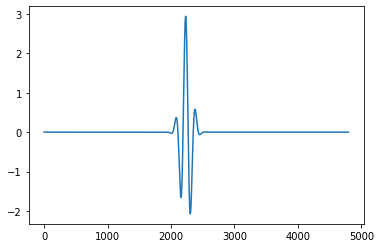

In [28]:
plt.plot(lg_oam.incident_field[9,10,:])

In [29]:
r = np.linspace(0,19,20)
phi = np.linspace(0,2*np.pi,150)

@interact(n=(0,4799,5))
def Plotter(n=0):
    fig = plt.figure(figsize=(12,6))
    #ax = fig.add_subplot(121, projection='polar')
    #ax.set_title(f"zmirror>refl_field")
    #ax.pcolormesh(phi,r,np.transpose(np.array((lg_oam.zmirror>lg_oam.refl_field), dtype=np.int), [1,0,2])[:,:,n])

    ax = fig.add_subplot(122, projection='polar')
    ax.set_title(f"zmirror")
    #ax.gca(projection="polar")
    ax.pcolormesh(phi,r,np.transpose(lg_oam.zmirror, [1,0,2])[:,:,n], shading='auto')

interactive(children=(IntSlider(value=0, description='n', max=4799, step=5), Output()), _dom_classes=('widget-…

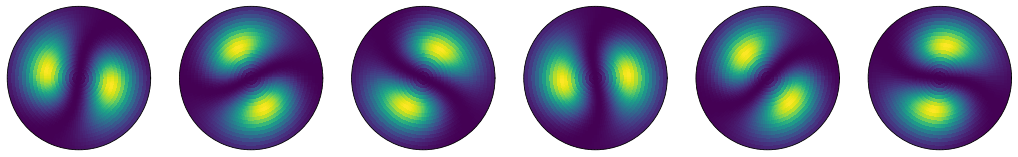

In [30]:
r = np.linspace(0,19,20)
phi = np.linspace(0,2*np.pi,150)
fig = plt.figure(figsize=(18,6))

for idx, i in enumerate(range(3,9)):
    k=24
    ax = fig.add_subplot(160+idx+1, projection='polar')
    #ax.set_title(f"Original pulse", fontsize=18)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    
    ax.pcolormesh(phi,r,np.transpose(lg_oam.zmirror, [1,0,2])[:,:,k*i], shading='auto')
    #ax.grid()

    #ax = fig.add_subplot(122, projection='polar')
    #ax.set_title(f"Filtered pulse", fontsize=18)
    #ax.pcolormesh(phi,r,np.transpose(lg_oam.zmirror, [1,0,2])[:,:,200], shading='auto')
    #ax.grid()
plt.savefig("nonzero_oam.png")
plt.show()

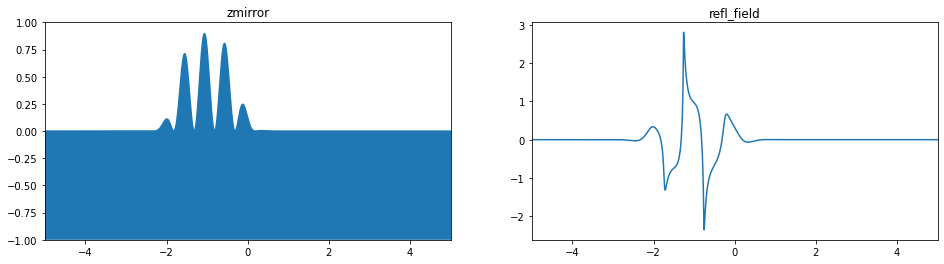

In [31]:
#plt.plot(lg_oam.zmirror[10,10])
#plt.show()
#plt.plot(lg_oam.refl_field[10,10])
#plt.show()
x = np.linspace(lg_oam.zmin, lg_oam.zmax, lg_oam.nofzs)
y1 = lg_oam.zmirror[10,10]
y2 = lg_oam.refl_field[10,10]
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(121)
ax.set_title(f"zmirror")
ax.plot(x,y1)
ax.set_xlim(-5,5)
ax.set_ylim(-1,1)
plt.fill_between(x, y1, -1)
ax = fig.add_subplot(122)
ax.set_title(f"refl_field")
#ax.gca(projection="polar")
ax.plot(x,y2)
ax.set_xlim(-5,5)
plt.show()

In [32]:
x.min(),x.max()

(-15.0, 15.0)

In [33]:
xlims = (-2.0, 0.5)
dist = xlims[1] - xlims[0]
dist_total = x.max() - x.min()
ratio = dist*1./dist_total
int(ratio*len(x))

400

# Visualization

In [34]:
unfiltered_oam = np.array([np.roll(lg_oam.refl_field[10,10], 300+2*i) for i in range(50)])
filtered_oam = np.real(np.fft.ifft(np.fft.fft(lg_oam.refl_field[10,10])*cut_func_total))
filtered_oam = np.array([np.roll(filtered_oam, 300+2*i) for i in range(50)])

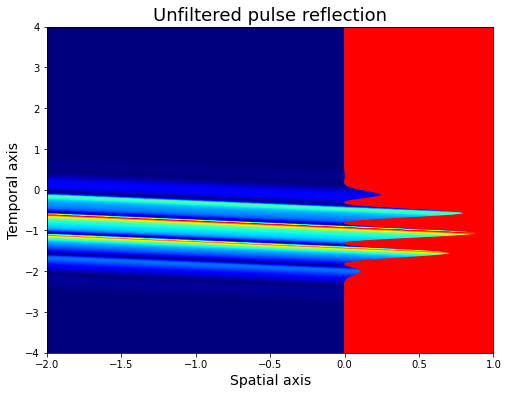

In [35]:
x = np.linspace(lg_oam.zmin, lg_oam.zmax, lg_oam.nofzs)
y1 = lg_oam.zmirror[10,10]
y2 = lg_oam.refl_field[10,10]
plt.figure(figsize=(8,6))
plt.title("Unfiltered pulse reflection", fontsize=18)
#plt.imshow(np.atleast_2d(lg_oam.zmirror[10,10][1580:3180]).T, cmap=plt.get_cmap('jet'),
#              extent=(-4, 4, -5, 5), aspect='auto')
plt.imshow(np.abs(unfiltered_oam).T, cmap=plt.get_cmap('jet'),
              extent=(-2, 2,-15,15), aspect='auto')

#plt.plot(range(len(x)),x, c='red')
plt.xlabel("Spatial axis", fontsize=14)
plt.ylabel("Temporal axis", fontsize=14)
plt.xlim(-2,1)
plt.ylim(-4,4)
plt.fill_betweenx(x, y1,1, color='red')
plt.savefig("unfiltered_propagation_v2.png")
plt.show()

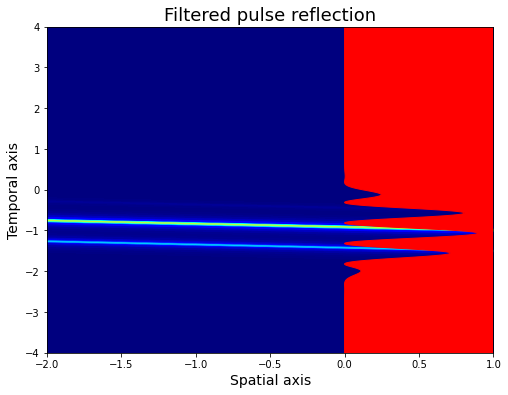

In [36]:
x = np.linspace(lg_oam.zmin, lg_oam.zmax, lg_oam.nofzs)
y1 = lg_oam.zmirror[10,10]
y2 = lg_oam.refl_field[10,10]

fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(111)
ax.set_title("Filtered pulse reflection", fontsize=18)
#ax.fill_betweenx(x, -y1,5, color='red')
#ax.imshow(np.abs(unfiltered_oam).T, cmap=plt.get_cmap('jet'),
#              extent=(-4, 4, -15, 15), aspect='auto')
#ax.set_xlim(-2,0.5)
#ax.set_ylim(-4,4)

#plt.gca().axes.get_yaxis().set_visible(False)
#plt.gca().axes.get_xaxis().set_visible(False)

#ax = fig.add_subplot(122)
ax.fill_betweenx(x, y1,5, color='red')
ax.imshow(np.abs(filtered_oam).T, cmap=plt.get_cmap('jet'),
          extent=(-4, 4, -15, 15), aspect='auto')
ax.set_xlim(-2,1)
ax.set_ylim(-4,4)
ax.set_xlabel("Spatial axis", fontsize=14)
ax.set_ylabel("Temporal axis", fontsize=14)

#plt.gca().axes.get_yaxis().set_visible(False)
#plt.gca().axes.get_xaxis().set_visible(False)
plt.savefig("filtered_propagation_v2.png")
plt.show()

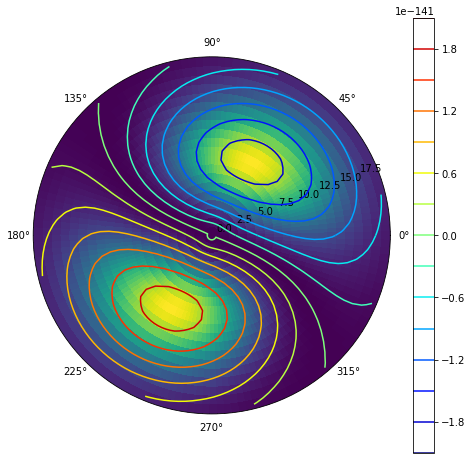

In [37]:
r = np.linspace(0,19,20)
phi = np.linspace(0,2*np.pi,150)

plt.figure(figsize=(8,8))
plt.gca(projection="polar")
plt.pcolormesh(phi,r,np.transpose(lg_oam.zmirror, [1,0,2])[:,:,200], shading='auto')
plt.contour(phi,r, np.transpose(lg_oam.refl_field, [1,0,2])[:,:,200], levels=14, cmap=plt.get_cmap('jet') )
plt.colorbar()
#plt.pcolormesh(phi,r,np.transpose(lg_oam.refl_field, [1,0,2])[:,:,200], shading='auto')
plt.show()

In [85]:
r = np.ones([150,20,1])
z = np.linspace(-15,15, 4800)
z = np.expand_dims(z,0)

z_array = np.einsum("ijk,kl",r,z)

x = np.linspace(-20,19, 40)
y = np.linspace(-20, 19, 40)
z = np.linspace(-15,15, 4800)

z_mask = (z_array >= lg_oam.zmirror).astype('int')
zmask_cartesian = np.zeros((40,40,4800))

for rho in range(20):
    for phi in range(150):
        #print(rho, phi, int(rho*np.cos(phi*2*np.pi/150.)),int(rho*np.sin(phi*2*np.pi/150.)))
        refl_field_cartesian[19+int(rho*np.cos(phi*2*np.pi/150.)), 19+int(rho*np.sin(phi*2*np.pi/150.)),:] = \
        z_mask[phi, rho, :]
        
        
filename='./refl_field_viz'
gridToVTK(filename, x/np.amax(x), y/np.amax(y), z/np.amax(z), pointData = {"zmask" : refl_field_cartesian})

'/Users/egor/Documents/Skoltech/hpc_thesis/wave_propagation/refl_field_viz.vtr'

In [43]:
x = np.linspace(-20,19, 40)
y = np.linspace(-20, 19, 40)
z = np.linspace(-15,15, 4800)

zmirror_cartesian = np.zeros((40,40,4800))
refl_cartesian = np.zeros((40,40,4800))

for rho in range(20):
    for phi in range(150):
        #print(rho, phi, int(rho*np.cos(phi*2*np.pi/150.)),int(rho*np.sin(phi*2*np.pi/150.)))
        refl_field_cartesian[19+int(rho*np.cos(phi*2*np.pi/150.)), 19+int(rho*np.sin(phi*2*np.pi/150.)),:] = \
        lg_oam.refl_field[phi, rho, :]
        zmirror_cartesian[19+int(rho*np.cos(phi*2*np.pi/150.)), 19+int(rho*np.sin(phi*2*np.pi/150.)),:] = \
        lg_oam.zmirror[phi, rho, :]
        
filename='./refl_field_viz'
gridToVTK(filename, x/np.amax(x), y/np.amax(y), z/np.amax(z), pointData = {"field_x" : refl_field_cartesian,
                                                                             "zmirror" : zmirror_cartesian})

'/Users/egor/Documents/Skoltech/hpc_thesis/wave_propagation/refl_field_viz.vtr'

In [ ]:
filtered_total = np.real(np.fft.ifft(np.fft.fft(lg_oam.refl_field)*cut_func_total))
#np.real(np.fft.ifft(np.fft.fft(lg_oam.refl_field[10,10])*cut_func_total))

In [ ]:
plt.plot(lg_oam.refl_field[5,5])
plt.plot(filtered_total[5,5]*10)

In [ ]:
r = np.linspace(0,19,20)
phi = np.linspace(0,2*np.pi,150)

plt.figure(figsize=(8,8))
plt.gca(projection="polar")
plt.pcolormesh(phi,r,np.transpose(lg_oam.zmirror, [1,0,2])[:,:,200], shading='auto')
plt.contour(phi,r, np.transpose(filtered_total, [1,0,2])[:,:,200], levels=3, cmap=plt.get_cmap('jet') )
plt.colorbar()
#plt.pcolormesh(phi,r,np.transpose(lg_oam.refl_field, [1,0,2])[:,:,200], shading='auto')
plt.show()

In [ ]:
x = np.arange(1, 10)
y = x.reshape(-1, 1)
h = x * y

cs = plt.contourf(h, levels=[10, 30, 50],
    colors=['#808080', '#A0A0A0', '#C0C0C0'], extend='both')
cs.cmap.set_over('red')
cs.cmap.set_under('blue')
cs.changed()

# Spectrograms

In [ ]:
np.linspace(lg_oam.zmin, lg_oam.zmax, lg_oam.nofzs)

In [ ]:
plt.imshow(a)

In [ ]:
dz = lg_mode.d_sampling_rate/(2*np.pi)      # in wavelength

window_width = 2.0   # in wavelengths
dtau_window = 0.1    # in wavelengths
nofzs_window = (zmax - zmin)/dtau_window


omegas = np.fft.fftfreq(lg_mode.refl_field.shape[2], d=dz)

idx = np.argwhere(np.abs(np.abs(omegas)-3)<1e-2)[0][0] #3rd harmonics idx

for r in range(lg_mode.refl_field.shape[0]):
    print(r)
    for phi in range(lg_mode.refl_field.shape[1]):
        field = lg_mode.refl_field[r,phi,:]
        sp=np.fft.fft(field)
        specgram_global = np.zeros((lg_mode.refl_field.shape[0],
                                    lg_mode.refl_field.shape[0] , 300,1), dtype=np.complex128)
        flag = False
        for n in np.arange(nofzs_window):
            window_pos = zmin+n * dtau_window
            window_func = np.exp(-(z/2/np.pi - window_pos)**100/window_width**100)
            y = field * window_func
            sp = np.fft.fft(y)

            # index 3rd harmonic
            # for example sp[10] corresponds to 3rd harmonic
            # r,phi, angle(sp[10])

            if flag == False:
                specgram = sp[idx]
                flag = True
            else:
                specgram = np.vstack([specgram, sp[idx]])
        #print(specgram.shape)
        specgram_global[r, phi] = specgram 

In [ ]:
window_pos = zmin + 0* dtau_window
window_func = np.exp(-((z/2/np.pi - window_pos)/window_width)**100)

In [ ]:
new_field = lg_mode.refl_field.reshape(-1)

In [ ]:
np.savetxt("field.txt", lg_mode.refl_field.reshape(-1))

In [ ]:
import ctypes

In [ ]:
libc = ctypes.CDLL("./libfilter.so")

#libc.apply_filter.restype = ctypes.c_double # define mean function return type

In [ ]:
libc.mean

In [ ]:
omegas = np.fft.fftfreq(lg_mode.refl_field.shape[2], d = dz)
@jit((complex128[:,:,:,:](float64[:,:,:],float64, float64, float64, float64[:])), cache=True, parallel=True)
def calculate_specgram(refl_field, dz, zmin, zmax, omegas):
    #dz = lg_mode.d_sampling_rate/(2*np.pi)      # in wavelength

    window_width = 2.0   # in wavelengths
    dtau_window = 0.1    # in wavelengths
    nofzs_window = (zmax - zmin)/dtau_window

    flag = False

    
    idx = np.argwhere(np.abs(np.abs(omegas)-3)<1e-2)[0][0] #3rd harmonics idx
    for r in range(refl_field.shape[0]):
        print(r)
        for phi in range(refl_field.shape[1]):
            field = refl_field[r,phi,:]
            sp=np.fft.fft(field)
            for n in np.arange(nofzs_window):
                window_pos = zmin+n * dtau_window
                window_func = np.exp(-(z/2/np.pi - window_pos)**100/window_width**100)
                y = field * window_func
                with objmode(out='complex128[:,:]'):
                    sp = np.fft.fft(y)

                # index 3rd harmonic
                # for example sp[10] corresponds to 3rd harmonic
                # r,phi, angle(sp[10])

                if flag == False:
                    specgram = sp[idx]
                    flag = True
                else:
                    specgram = np.vstack([specgram, sp[idx]])

In [ ]:
calculate_specgram(lg_mode.refl_field,dz,zmin, zmax, omegas)

In [ ]:
nrows = 2306
ncols = 95
Z = np.abs(spectrogram_result)
print(Z.shape)
x = np.arange(ncols + 1)
y = np.arange(nrows + 1)


plt.pcolormesh(x, y, Z,)

In [ ]:
spectrogram_result.shape == Z.shape

In [ ]:
y.shape

In [ ]:
Z.shape

In [ ]:
import example

In [ ]:
%%timeit
b = example.multiply(np.linspace(-15,15,2400),1)

In [ ]:
z = np.linspace(-15,15,2400)
window_pos=-15.
window_width = 2.0


In [ ]:
%%timeit
window_func = np.exp(-(z/2/np.pi - window_pos)**100/window_width**100)